# JOB-ATHON

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv("TRAIN.csv")
df2 = pd.read_csv("TEST_FINAL.csv")

In [4]:
df1.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [5]:
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [8]:
df1.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [9]:
df1.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [10]:
cat = df1.select_dtypes(include=np.object)
print("The number of categotical variables is : ",cat.shape[1])
num = df1.select_dtypes(include=(np.int64,np.float64))
print("The number of numerical variables is: ",num.shape[1])

The number of categotical variables is :  6
The number of numerical variables is:  4


In [11]:
df2.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

In [12]:
df2.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount'],
      dtype='object')

In [13]:
cat1 = df2.select_dtypes(include=np.object)
print("The number of categotical variables is : ",cat1.shape[1])
num1 = df2.select_dtypes(include=(np.int64,np.float64))
print("The number of numerical variables is: ",num1.shape[1])

The number of categotical variables is :  6
The number of numerical variables is:  2


In [14]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_id,188340.0,183.000000,105.366308,1.0,92.0,183.0,274.0,365.0
Holiday,188340.0,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
#Order,188340.0,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Store_id,22265.0,183.000000,105.368395,1.0,92.0,183.0,274.0,365.0
Holiday,22265.0,0.032787,0.178082,0.0,0.0,0.0,0.0,1.0


In [16]:
df1.shape

(188340, 10)

In [17]:
df2.shape

(22265, 8)

In [18]:
df1 = df1.drop(['ID','Date','#Order'],axis=1)
df2 = df2.drop(['Date'],axis=1)

In [19]:
df1.head()

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales
0,1,S1,L3,R1,1,Yes,7011.84
1,253,S4,L2,R1,1,Yes,51789.12
2,252,S3,L2,R1,1,Yes,36868.20
3,251,S2,L3,R1,1,Yes,19715.16
4,250,S2,L3,R4,1,Yes,45614.52


In [20]:
df2.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount
0,T1188341,171,S4,L2,R3,0,No
1,T1188342,172,S1,L1,R1,0,No
2,T1188343,173,S4,L2,R1,0,No
3,T1188344,174,S1,L1,R4,0,No
4,T1188345,170,S1,L1,R2,0,No


# EDA ON TRAIN DATA
**Univariate analysis**

<AxesSubplot:ylabel='Store_Type'>

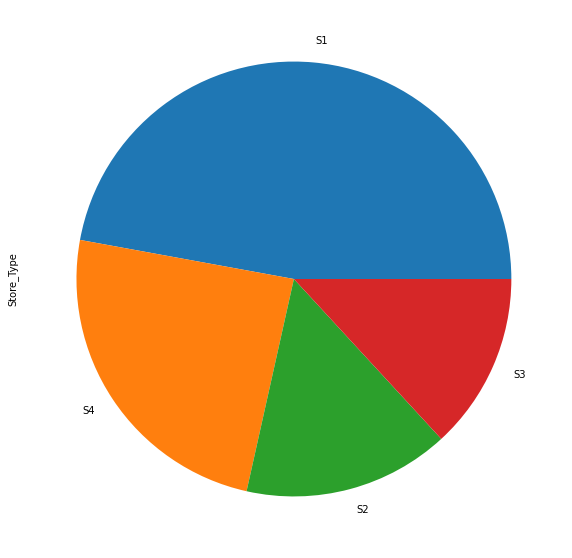

In [21]:
a = df1.loc[:,'Store_Type'].value_counts()
a.plot(kind='pie',figsize=(15,10))

<AxesSubplot:ylabel='Location_Type'>

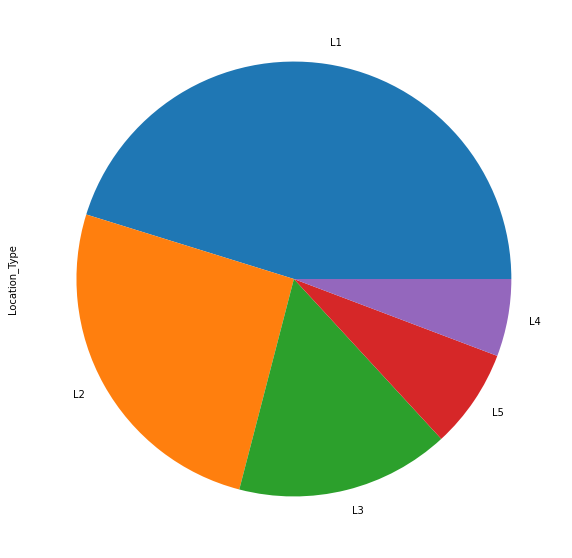

In [22]:
b = df1.loc[:,'Location_Type'].value_counts()
b.plot(kind='pie',figsize=(15,10))

<AxesSubplot:ylabel='Region_Code'>

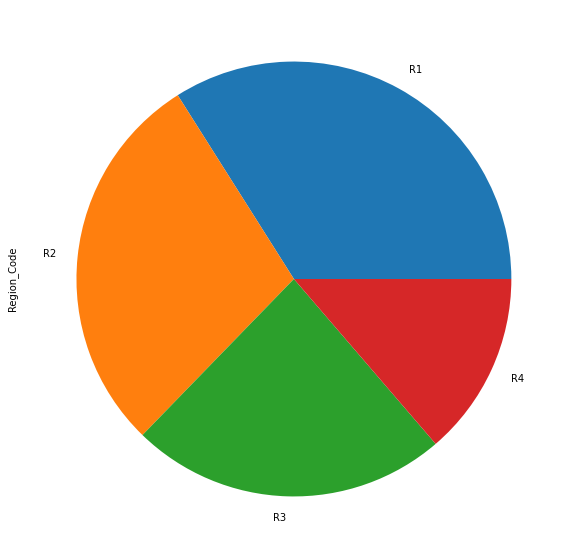

In [23]:
c = df1.loc[:,'Region_Code'].value_counts()
c.plot(kind='pie',figsize=(15,10))

<AxesSubplot:xlabel='Discount', ylabel='count'>

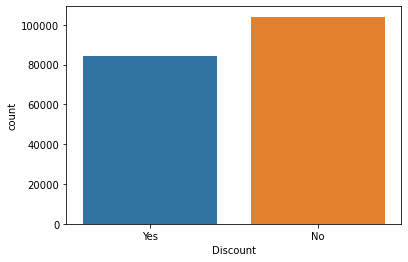

In [24]:
sns.countplot(df1['Discount'])

<AxesSubplot:xlabel='Holiday', ylabel='count'>

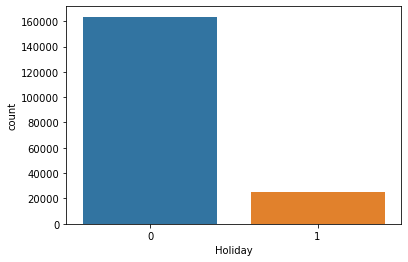

In [25]:
sns.countplot(df1['Holiday'])

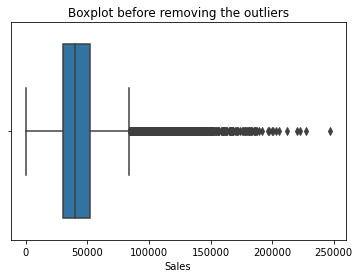

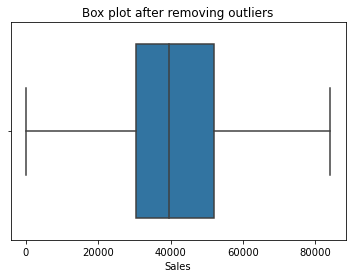

In [26]:
sns.boxplot(df1['Sales'])
plt.title('Boxplot before removing the outliers')
plt.show()

def replace_outliers(df, field_name):
    Q1 = np.percentile(df[field_name],25,interpolation='midpoint')
    Q3 = np.percentile(df[field_name],75,interpolation='midpoint')
    IQR = Q3-Q1
    maxi = Q3+1.5*IQR
    mini = Q1-1.5*IQR
    df[field_name]=df[field_name].mask(df[field_name]>maxi,maxi)
    df[field_name]=df[field_name].mask(df[field_name]<mini,mini)

replace_outliers(df1, 'Sales')
sns.boxplot(df1['Sales'])
plt.title('Box plot after removing outliers')
plt.show()

**Bivariate analysis**

Store_Type
S1    37643.772852
S2    27530.095763
S3    46857.761363
S4    58074.006631
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Store_Type'>

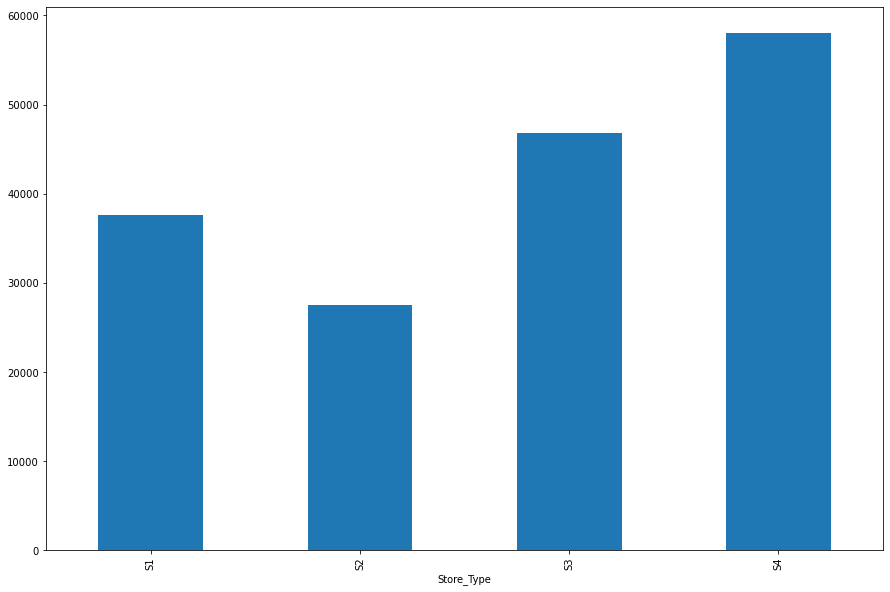

In [27]:
gp1 = df1.groupby(['Store_Type'])['Sales'].mean()
print(gp1)
gp1.plot(kind='bar',figsize=(15,10))

Location_Type
L1    41376.322814
L2    57434.547515
L3    33065.302632
L4    29065.781285
L5    25187.545866
Name: Sales, dtype: float64


<AxesSubplot:ylabel='Sales'>

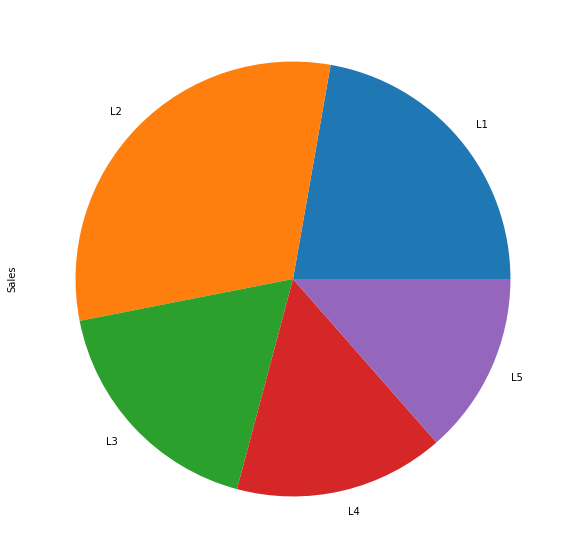

In [28]:
gp2 = df1.groupby(['Location_Type'])['Sales'].mean()
print(gp2)
gp2.plot(kind='pie',figsize=(15,10))

Region_Code
R1    45794.353868
R2    39800.732280
R3    41861.871703
R4    39529.513865
Name: Sales, dtype: float64


<AxesSubplot:ylabel='Sales'>

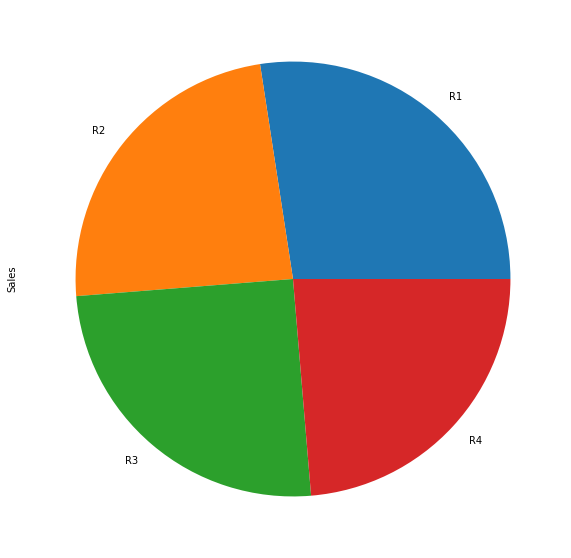

In [29]:
gp3 = df1.groupby(['Region_Code'])['Sales'].mean()
print(gp3)
gp3.plot(kind='pie',figsize=(15,10))

Discount  Holiday
No        0          38011.337249
          1          31433.904572
Yes       0          50077.536238
          1          39337.254085
Name: Sales, dtype: float64


<AxesSubplot:xlabel='Discount,Holiday'>

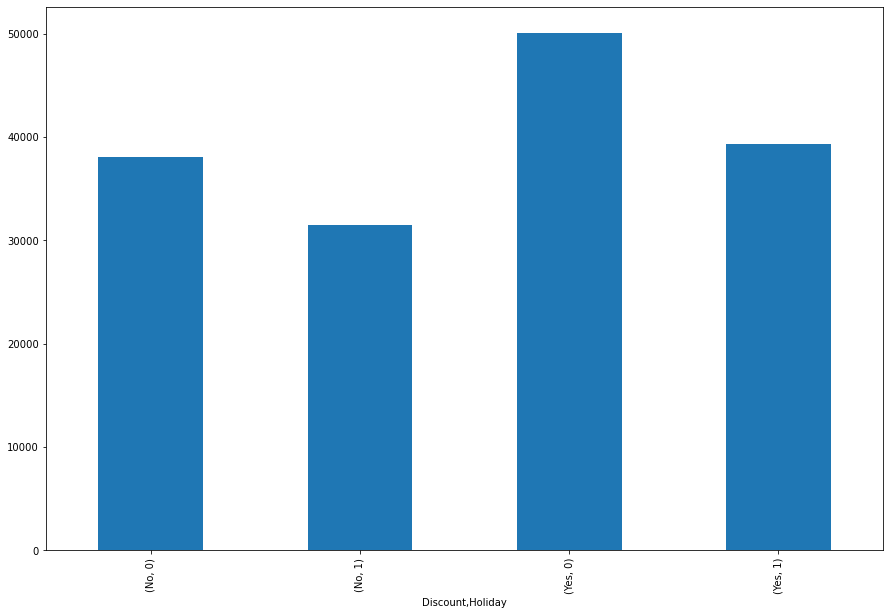

In [30]:
gp4 = df1.groupby(['Discount','Holiday'])['Sales'].mean()
print(gp4)
gp4.plot(kind='bar',figsize=(15,10))

Store_id
175    79867.273081
337    79345.821279
312    78205.734593
126    78071.082267
160    75928.214244
146    75552.856105
354    73144.444186
153    72332.893081
173    70888.771337
85     66762.591163
315    66691.891221
336    65888.105814
87     65588.208314
176    65521.923314
294    65470.402616
131    65198.145814
15     64552.454186
219    64425.706163
150    63895.791860
11     63473.606860
Name: Sales, dtype: float64


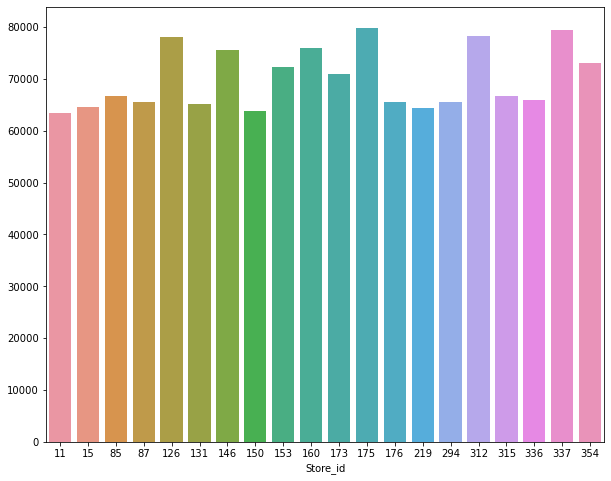

In [31]:
gp5 = df1.groupby(['Store_id'])['Sales'].mean().sort_values(ascending=False)[:20]
print(gp5)
plt.figure(figsize=(10,8))
sns.barplot(gp5.index,gp5.values)
plt.show()

In [32]:
gp6 = df1.groupby(['Location_Type','Region_Code'])['Store_Type'].count()
print(gp6)

Location_Type  Region_Code
L1             R1             26316
               R2             24768
               R3             20640
               R4             13416
L2             R1             19608
               R2             10836
               R3             11868
               R4              6192
L3             R1              8772
               R2              9288
               R3              8772
               R4              3096
L4             R1              3096
               R2              4644
               R3              2064
               R4              1032
L5             R1              6192
               R2              4644
               R3              1032
               R4              2064
Name: Store_Type, dtype: int64


# EDA ON TEST DATA
**Univariate analysis**

<AxesSubplot:ylabel='Store_Type'>

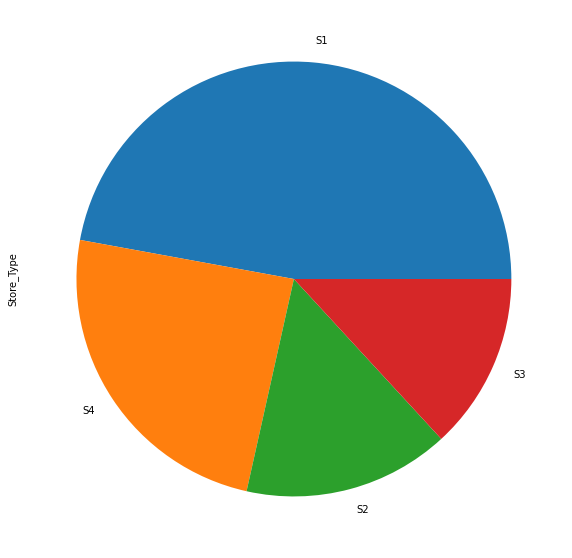

In [33]:
a1 = df2.loc[:,'Store_Type'].value_counts()
a1.plot(kind='pie',figsize=(15,10))

<AxesSubplot:ylabel='Location_Type'>

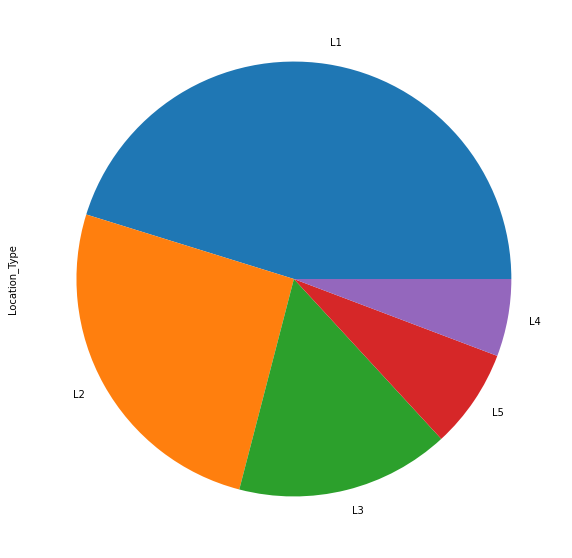

In [34]:
b1 = df2.loc[:,'Location_Type'].value_counts()
b1.plot(kind='pie',figsize=(15,10))

<AxesSubplot:ylabel='Region_Code'>

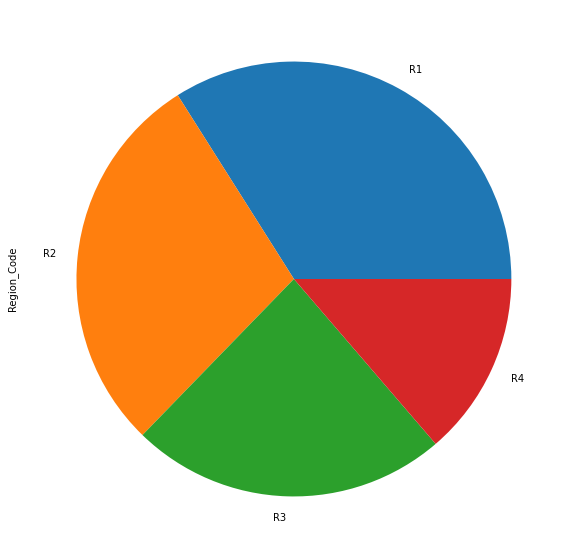

In [35]:
c1 = df2.loc[:,'Region_Code'].value_counts()
c1.plot(kind='pie',figsize=(15,10))

<AxesSubplot:xlabel='Discount', ylabel='count'>

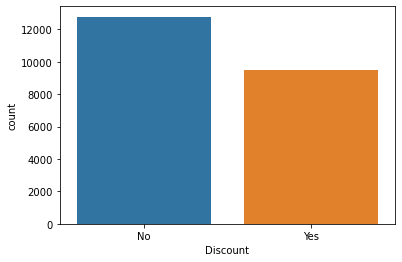

In [36]:
sns.countplot(df2['Discount'])

<AxesSubplot:xlabel='Holiday', ylabel='count'>

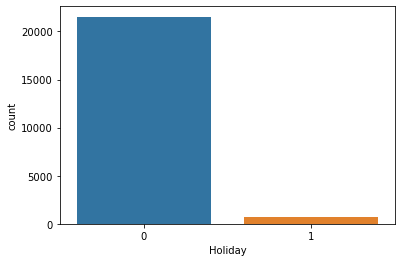

In [37]:
sns.countplot(df2['Holiday'])

**Bivariate Analysis**

In [38]:
gp7 = df2.groupby(['Location_Type','Region_Code'])['Store_Type'].count()
print(gp7)

Location_Type  Region_Code
L1             R1             3111
               R2             2928
               R3             2440
               R4             1586
L2             R1             2318
               R2             1281
               R3             1403
               R4              732
L3             R1             1037
               R2             1098
               R3             1037
               R4              366
L4             R1              366
               R2              549
               R3              244
               R4              122
L5             R1              732
               R2              549
               R3              122
               R4              244
Name: Store_Type, dtype: int64


# Pre - Processing

In [39]:
from sklearn.preprocessing import LabelEncoder
df1['Discount'] = LabelEncoder().fit_transform(df1['Discount'])
df2['Discount'] = LabelEncoder().fit_transform(df2['Discount'])

In [40]:
for i in df1['Store_Type'].unique():
    df1['Store_Type'+'_'+i]=np.where(df1['Store_Type']==i,1,0)

In [41]:
for i in df1['Location_Type'].unique():
    df1['Location_Type'+'_'+i]=np.where(df1['Location_Type']==i,1,0)

In [42]:
for i in df1['Region_Code'].unique():
    df1['Region_Code'+'_'+i]=np.where(df1['Region_Code']==i,1,0)

In [43]:
for i in df2['Store_Type'].unique():
    df2['Store_Type'+'_'+i]=np.where(df2['Store_Type']==i,1,0)

In [44]:
for i in df2['Location_Type'].unique():
    df2['Location_Type'+'_'+i]=np.where(df2['Location_Type']==i,1,0)

In [45]:
for i in df2['Region_Code'].unique():
    df2['Region_Code'+'_'+i]=np.where(df2['Region_Code']==i,1,0)

In [46]:
df1.columns

Index(['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Holiday',
       'Discount', 'Sales', 'Store_Type_S1', 'Store_Type_S4', 'Store_Type_S3',
       'Store_Type_S2', 'Location_Type_L3', 'Location_Type_L2',
       'Location_Type_L1', 'Location_Type_L5', 'Location_Type_L4',
       'Region_Code_R1', 'Region_Code_R4', 'Region_Code_R2', 'Region_Code_R3'],
      dtype='object')

In [47]:
df1 = df1.drop(['Store_id','Store_Type','Location_Type','Region_Code'],axis=1)
df2 = df2.drop(['Store_id','Store_Type','Location_Type','Region_Code'],axis=1)
df1 = df1[['Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3',
       'Store_Type_S4','Location_Type_L1', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4',
          'Holiday','Discount', 'Sales']]
df2 = df2[['ID','Store_Type_S1', 'Store_Type_S2', 'Store_Type_S3',
       'Store_Type_S4','Location_Type_L1', 'Location_Type_L2',
       'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5',
       'Region_Code_R1', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4',
          'Holiday','Discount']]

In [48]:
df1.head()

,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday,Discount,Sales
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,7011.84
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,51789.12
2,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,36868.20
3,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,19715.16
4,0,1,0,0,0,0,1,0,0,0,0,0,1,1,1,45614.52


In [49]:
df2.head()

,ID,Store_Type_S1,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L1,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R1,Region_Code_R2,Region_Code_R3,Region_Code_R4,Holiday,Discount
0,T1188341,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0
1,T1188342,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,T1188343,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0
3,T1188344,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,T1188345,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0


<AxesSubplot:>

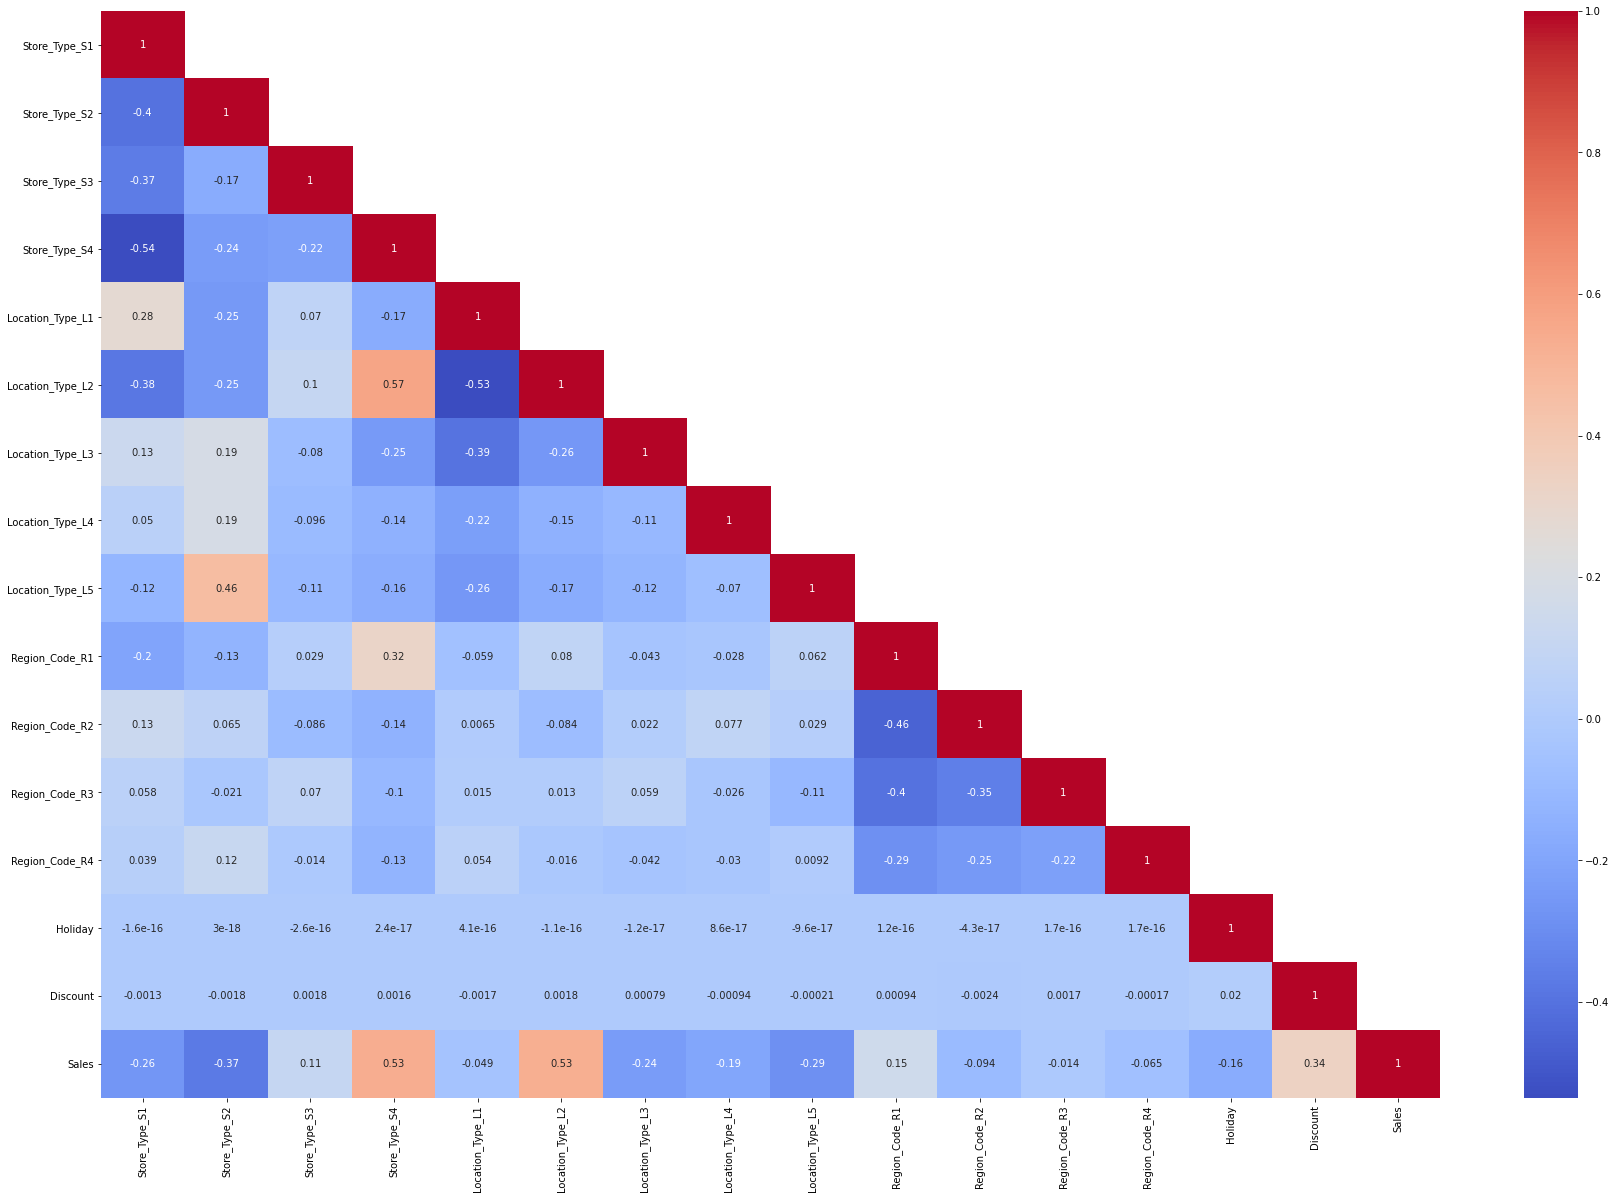

In [50]:
plt.figure(figsize=(30,20))
df_lt = df1.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

# Model Selection

In [51]:
X = df1.drop('Sales',axis=1)
y = df1['Sales']

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [53]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(131838, 15)
(56502, 15)
(131838,)
(56502,)


# Model building
**1.Linear Regression**

In [54]:
from sklearn.linear_model import LinearRegression
le = LinearRegression()
le.fit(X_train,y_train)

LinearRegression()

In [55]:
x_pred1 = le.predict(X_train)
y_pred1 = le.predict(X_test)

In [56]:
temp_1 = pd.DataFrame({'actual':y_test,'predicted':y_pred1})
temp_1

,actual,predicted
2393,32667.00,27473.8750
28079,70352.25,60002.0000
31424,34824.00,46049.1250
93670,34365.00,47777.4375
80507,37107.00,34864.1875
...,...,...
133834,53619.00,57094.0625
178139,62964.00,36572.6250
125450,41610.00,59255.0000
147857,58940.82,26001.9375


In [57]:
from sklearn import metrics
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred1))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred1))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred1))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred1))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred1,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred1,squared=False))

Mean absolute error on training set:  8104.646554255981
Mean absolute error on testing set:  8097.091257212133
Mean squared error on training set:  117507571.92586076
Mean squared error on testing set:  117797377.81275259
Root Mean squared error on training set:  10840.090955608295
Root Mean squared error on testing set:  10853.45004193379


**2.Random Forest regressor**

In [59]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [60]:
x_pred2 = rf.predict(X_train)
y_pred2 = rf.predict(X_test)

In [61]:
temp_2 = pd.DataFrame({'actual':y_test,'predicted':y_pred2})
temp_2

,actual,predicted
2393,32667.00,27835.497198
28079,70352.25,57659.545302
31424,34824.00,47943.178889
93670,34365.00,45239.902369
80507,37107.00,35094.465686
...,...,...
133834,53619.00,59460.235115
178139,62964.00,33185.186679
125450,41610.00,60016.442644
147857,58940.82,29425.409245


In [62]:
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred2))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred2))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred2))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred2))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred2,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred2,squared=False))

Mean absolute error on training set:  7897.581784081738
Mean absolute error on testing set:  7908.114969225
Mean squared error on training set:  112936295.99243622
Mean squared error on testing set:  113362046.09842962
Root Mean squared error on training set:  10627.14900584518
Root Mean squared error on testing set:  10647.161410368006


**3. Extra Tree Regressor**

In [65]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(X_train,y_train)

ExtraTreesRegressor()

In [66]:
x_pred3 = et.predict(X_train)
y_pred3 = et.predict(X_test)

In [67]:
temp_3 = pd.DataFrame({'actual':y_test,'predicted':y_pred3})
temp_3

,actual,predicted
2393,32667.00,27820.933837
28079,70352.25,57698.176579
31424,34824.00,47944.623936
93670,34365.00,45220.454246
80507,37107.00,35105.639127
...,...,...
133834,53619.00,59456.097135
178139,62964.00,33202.937313
125450,41610.00,60008.497459
147857,58940.82,29419.153329


In [68]:
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred3))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred3))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred3))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred3))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred3,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred3,squared=False))

Mean absolute error on training set:  7896.9874322854575
Mean absolute error on testing set:  7907.675826905508
Mean squared error on training set:  112934305.94502182
Mean squared error on testing set:  113364942.56554209
Root Mean squared error on training set:  10627.055375080241
Root Mean squared error on testing set:  10647.297430124796


**4.Boosting**

In [70]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1,n_jobs=4,n_estimators=5000,
                  learning_rate=0.01,subsample=0.9,
                  max_depth=5,colsample_bytree=0.5,reg_alpha=0.5,eval_metric='rmse')
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=5000, n_jobs=4,
             num_parallel_tree=1, random_state=1, reg_alpha=0.5, reg_lambda=1,
             scale_pos_weight=1, subsample=0.9, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [71]:
x_pred4 = xgb.predict(X_train)
y_pred4 = xgb.predict(X_test)

In [72]:
temp_4 = pd.DataFrame({'actual':y_test,'predicted':y_pred4})
temp_4

,actual,predicted
2393,32667.00,27786.302734
28079,70352.25,57562.464844
31424,34824.00,47959.761719
93670,34365.00,45258.804688
80507,37107.00,35091.941406
...,...,...
133834,53619.00,59427.089844
178139,62964.00,33239.964844
125450,41610.00,59964.246094
147857,58940.82,29419.707031


In [73]:
print("Mean absolute error on training set: ",metrics.mean_absolute_error(y_train,x_pred4))
print("Mean absolute error on testing set: ",metrics.mean_absolute_error(y_test,y_pred4))
print("Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred4))
print("Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred4))
print("Root Mean squared error on training set: ",metrics.mean_squared_error(y_train,x_pred4,squared=False))
print("Root Mean squared error on testing set: ",metrics.mean_squared_error(y_test,y_pred4,squared=False))

Mean absolute error on training set:  7896.507569311508
Mean absolute error on testing set:  7905.465110554715
Mean squared error on training set:  112958799.46521221
Mean squared error on testing set:  113363604.4838299
Root Mean squared error on training set:  10628.207725915607
Root Mean squared error on testing set:  10647.234593256124


# Submission

In [75]:
test_set = df2.drop(['ID'],axis=1)
test_set_org = test_set.copy()

In [84]:
predictions = le.predict(test_set_org)
output = pd.DataFrame({'ID':df2['ID'],'Sales':predictions})
output.to_csv('Submissions.csv',index=False)

In [81]:
pd.DataFrame(predictions).shape

(22265, 1)